In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [274]:
Markating_Campaign = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/marketing_campaign.csv")


#Descriptive Analysis

Basic Structure:

In [251]:
Markating_Campaign.head(2)

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,TechCorp,Email,Women 25-34,30 days,Facebook,5.294194,9344,62.94,Houston,English,3045,67836,5,Tech Enthusiasts,01-01-2023
1,2,Innovate Industries,Influencer,Women 35-44,45 days,Google Ads,3.326375,8783,10.67,"Washington, D.C.",German,1944,66361,4,Foodies,01-01-2023


In [252]:
Markating_Campaign.shape

(22029, 16)

In [253]:
Markating_Campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22029 entries, 0 to 22028
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Campaign_ID       22029 non-null  int64  
 1   Company           22029 non-null  object 
 2   Campaign_Type     22029 non-null  object 
 3   Target_Audience   22029 non-null  object 
 4   Duration          22029 non-null  object 
 5   Channel_Used      22029 non-null  object 
 6   Conversion_Rate   22029 non-null  float64
 7   Acquisition_Cost  22029 non-null  int64  
 8   ROI               22029 non-null  float64
 9   Location          22029 non-null  object 
 10  Language          22029 non-null  object 
 11  Clicks            22029 non-null  int64  
 12  Impressions       22029 non-null  int64  
 13  Engagement_Score  22029 non-null  int64  
 14  Customer_Segment  22029 non-null  object 
 15  Date              22029 non-null  object 
dtypes: float64(2), int64(5), object(9)
memor

In [254]:
Markating_Campaign[['Campaign_ID', 'Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Impressions', 'Engagement_Score']]

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Impressions,Engagement_Score
0,1,5.294194,9344,62.94,67836,5
1,2,3.326375,8783,10.67,66361,4
2,3,4.056375,9111,73.20,86240,8
3,4,4.496375,7420,60.92,58251,6
4,5,4.405930,2146,138.82,34407,5
...,...,...,...,...,...,...
22024,22025,4.379947,4748,-7.01,20848,8
22025,22026,5.889947,5567,-87.96,2332,8
22026,22027,4.319947,7154,-9.21,31078,9
22027,22028,3.959947,6471,95.18,66129,8


Data Exploration:

In [255]:
Markating_Campaign['Campaign_ID'].unique()

array([    1,     2,     3, ..., 22027, 22028, 22029])

In [256]:
Markating_Campaign.groupby('Location')['Customer_Segment'].unique()

,Customer_Segment
Location,
Atlanta,"[Health & Wellness, Outdoor Adventurers, Fashi..."
Chicago,"[Tech Enthusiasts, Outdoor Adventurers, Health..."
Dallas,"[Health & Wellness, Fashionistas, Tech Enthusi..."
Houston,"[Tech Enthusiasts, Outdoor Adventurers, Foodie..."
Los Angeles,"[Foodies, Health & Wellness, Fashionistas, Tec..."
Miami,"[Fashionistas, Health & Wellness, Tech Enthusi..."
New York,"[Outdoor Adventurers, Health & Wellness, Tech ..."
San Francisco,"[Outdoor Adventurers, Tech Enthusiasts, Foodie..."
Seattle,"[Foodies, Outdoor Adventurers, Fashionistas, T..."


In [257]:
Markating_Campaign.groupby('Channel_Used')['Campaign_Type'].value_counts()

Channel_Used  Campaign_Type
Email         Display          761
              Social Media     734
              Search           732
              Email            702
              Influencer       695
Facebook      Email            767
              Search           766
              Social Media     744
              Influencer       743
              Display          722
Google Ads    Social Media     757
              Display          752
              Search           750
              Email            723
              Influencer       712
Instagram     Influencer       753
              Display          751
              Search           728
              Email            710
              Social Media     707
Website       Email            764
              Search           764
              Social Media     739
              Display          733
              Influencer       688
YouTube       Influencer       747
              Display          731
              Social Media     731
              Email            722
              Search           701
Name: count, dtype: int64

#Exploratory Data Analysis (EDA) and Visualization

Campaign Performance:

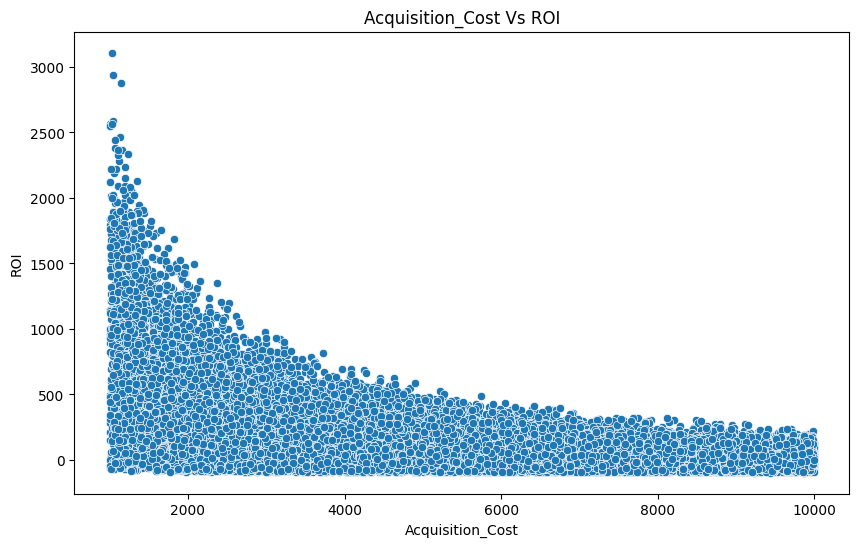

In [258]:
plt.figure(figsize=(10,6))
sns.scatterplot(data= Markating_Campaign, x= 'Acquisition_Cost', y= 'ROI')
plt.title('Acquisition_Cost Vs ROI')
plt.show()

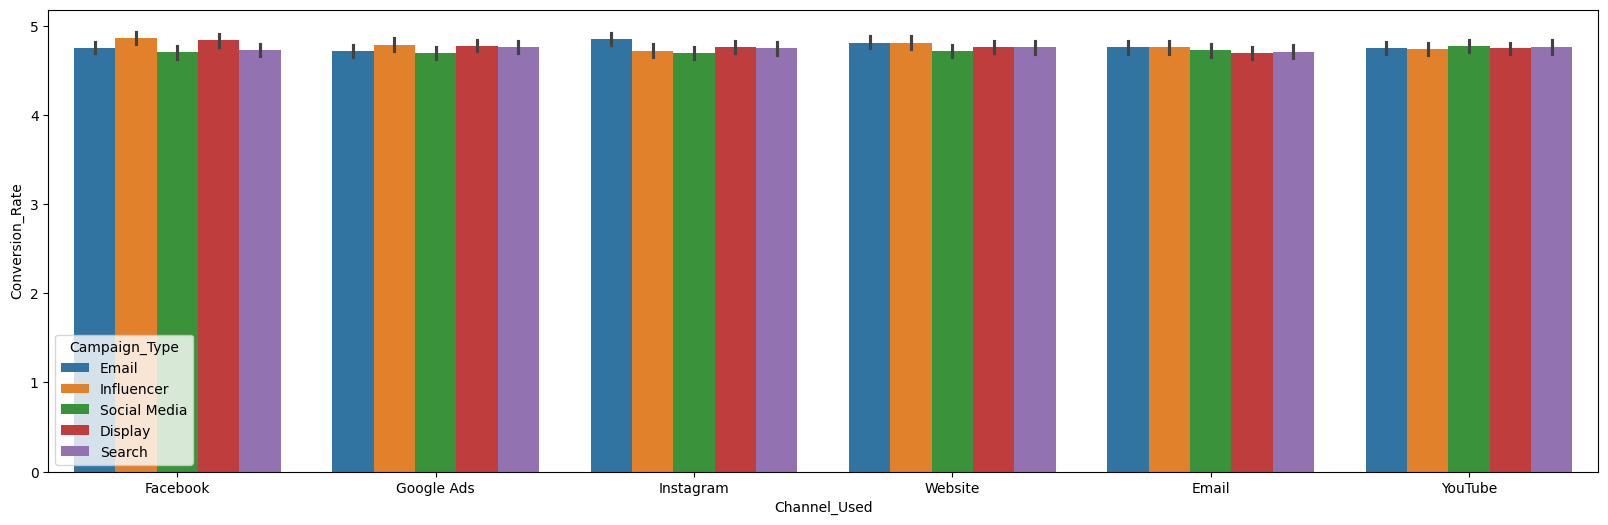

In [216]:
plt.figure(figsize = (20,6))
sns.barplot(data= Markating_Campaign, x= 'Channel_Used', y = 'Conversion_Rate', hue= 'Campaign_Type', estimator= 'average')
plt.show()

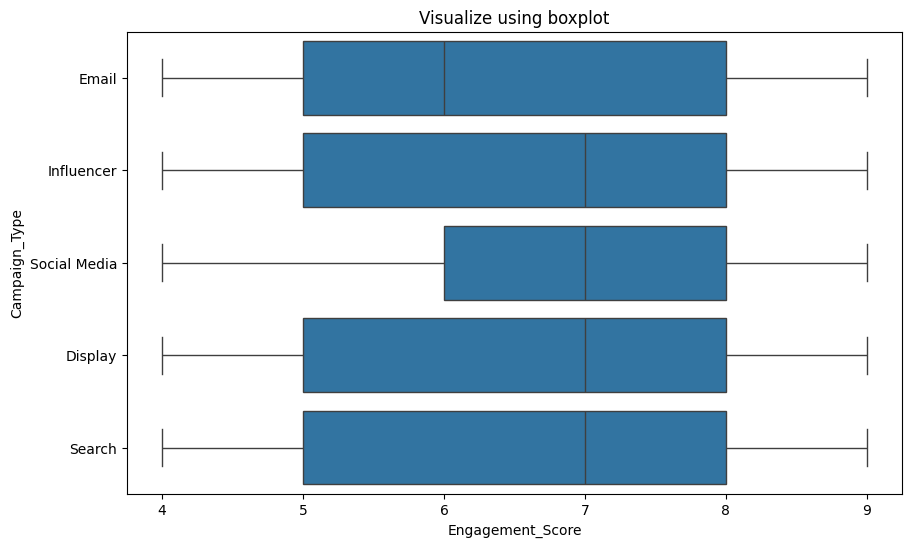

In [217]:
plt.figure(figsize=(10,6))
sns.boxplot(data= Markating_Campaign, x= 'Engagement_Score', y= 'Campaign_Type')
plt.title('Visualize using boxplot')
plt.show()

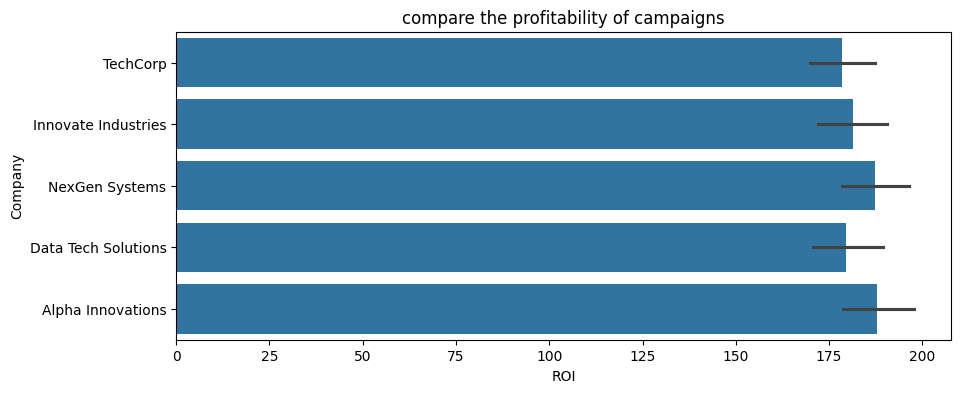

In [218]:
plt.figure(figsize=(10,4))
sns.barplot(Markating_Campaign, x= 'ROI', y= 'Company')
plt.title('compare the profitability of campaigns')
plt.show()

Company nexgen systems & Alpha innovations show good profitability.

In [219]:
correlation = Markating_Campaign[['Engagement_Score', 'Conversion_Rate']].corr()
correlation

,Engagement_Score,Conversion_Rate
Engagement_Score,1.000000,0.010546
Conversion_Rate,0.010546,1.000000


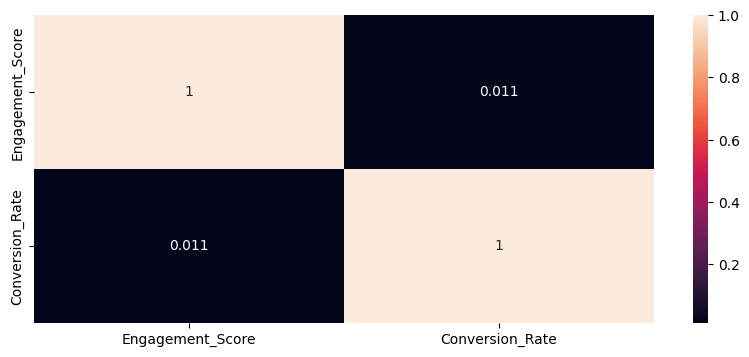

In [220]:
plt.figure(figsize=(10,4))
sns.heatmap(correlation, annot= True)
plt.show()

Customer Segmentation

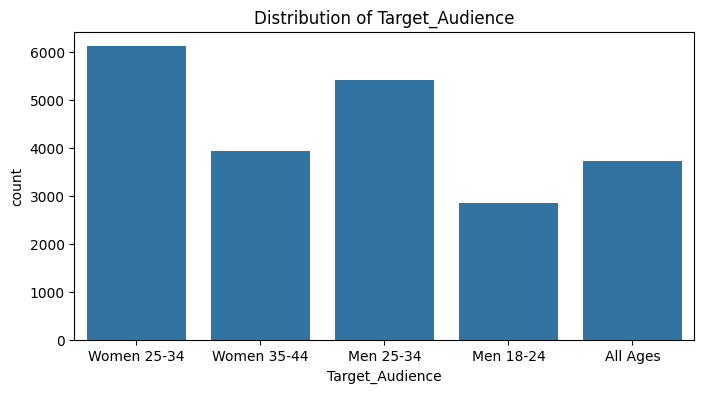

In [221]:
plt.figure(figsize=(8,4))
sns.countplot(data= Markating_Campaign, x = 'Target_Audience')
plt.title('Distribution of Target_Audience')
plt.show()

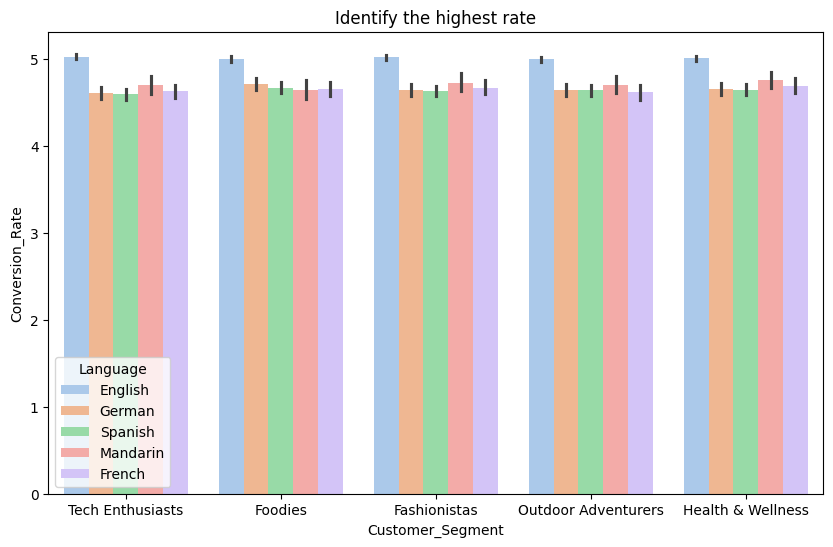

In [222]:
plt.figure(figsize=(10,6))
sns.barplot(Markating_Campaign, x= 'Customer_Segment', y='Conversion_Rate', hue= 'Language', palette='pastel', legend= 'full')
plt.title('Identify the highest rate')
plt.show()


Health & wellness customer segment illustrated the better conversion rate.

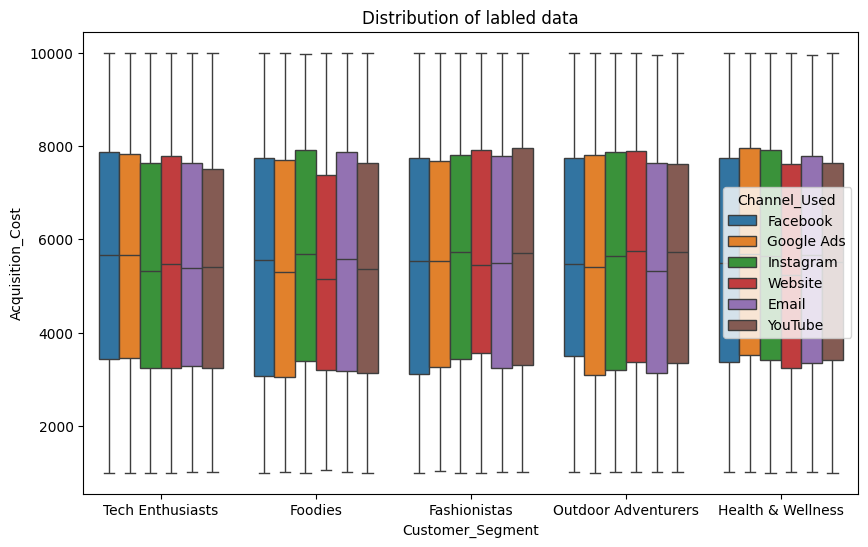

In [223]:
plt.figure(figsize=(10,6))
sns.boxplot(Markating_Campaign, x= 'Customer_Segment', y= 'Acquisition_Cost', hue= 'Channel_Used', legend= 'brief')
plt.title('Distribution of labled data')
plt.show()

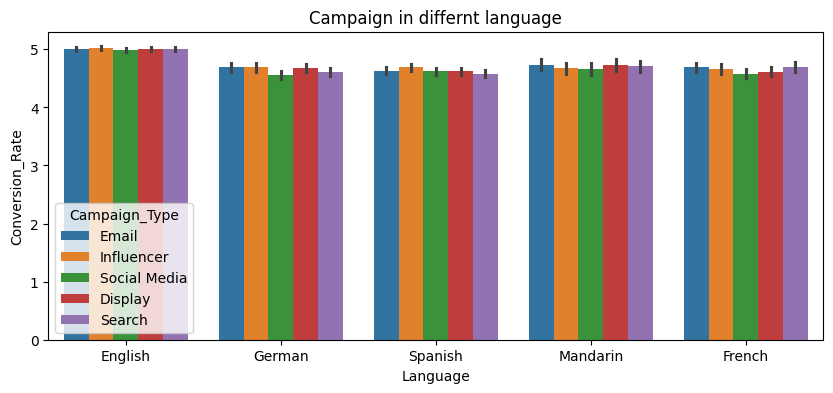

In [224]:
plt.figure(figsize=(10,4))
sns.barplot(Markating_Campaign, x= 'Language', y= 'Conversion_Rate', hue= 'Campaign_Type', estimator= "average")
plt.title('Campaign in differnt language')
plt.show()

ENGLISH Language shows the high conversion rate.

Channel Effectiveness:

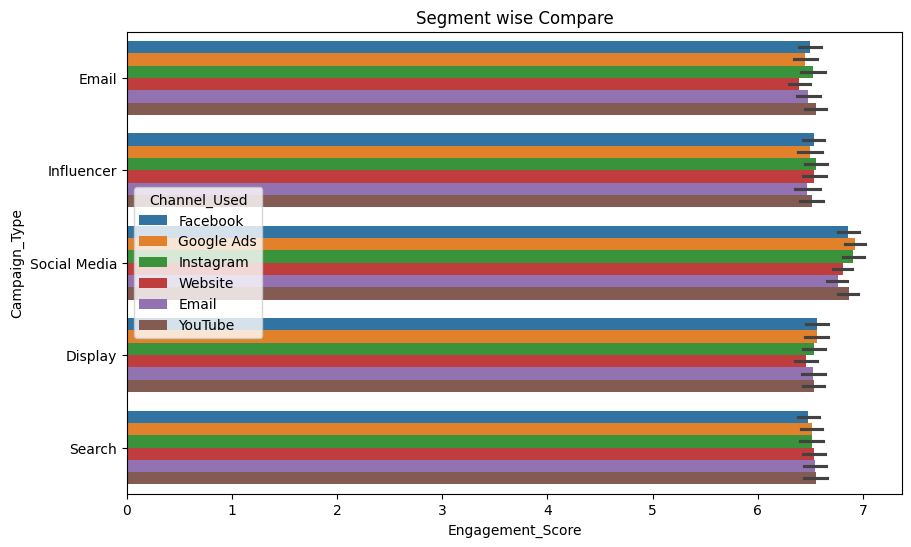

In [225]:
plt.figure(figsize=(10,6))
sns.barplot(Markating_Campaign, x= 'Engagement_Score', y= 'Campaign_Type', hue= 'Channel_Used', legend= 'full')
plt.title('Segment wise Compare')
plt.show()


By comparing with all segments  from Campaign type Scocial Media have different engagement score

In [226]:
import plotly.express as px
fig = px.pie(Markating_Campaign, values= 'ROI', names= 'Channel_Used', title= 'pie distribution')
fig.show()

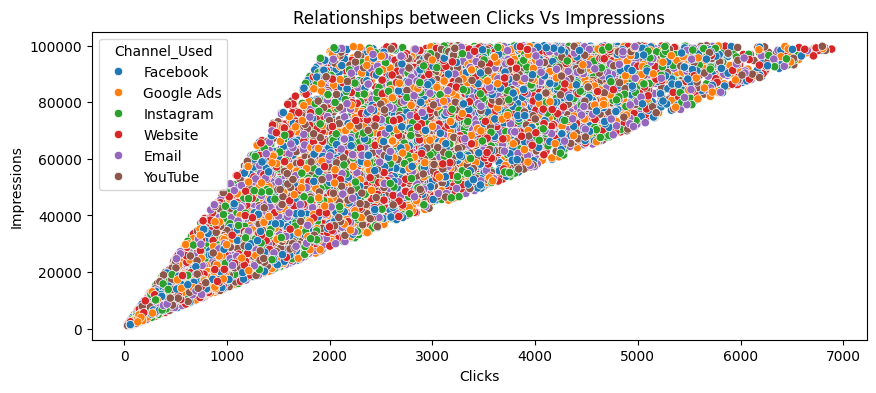

In [227]:
plt.figure(figsize=(10,4))
sns.scatterplot(Markating_Campaign, x= 'Clicks', y= 'Impressions', hue= 'Channel_Used')
plt.title('Relationships between Clicks Vs Impressions')
plt.show()

Time-Based Analysis:

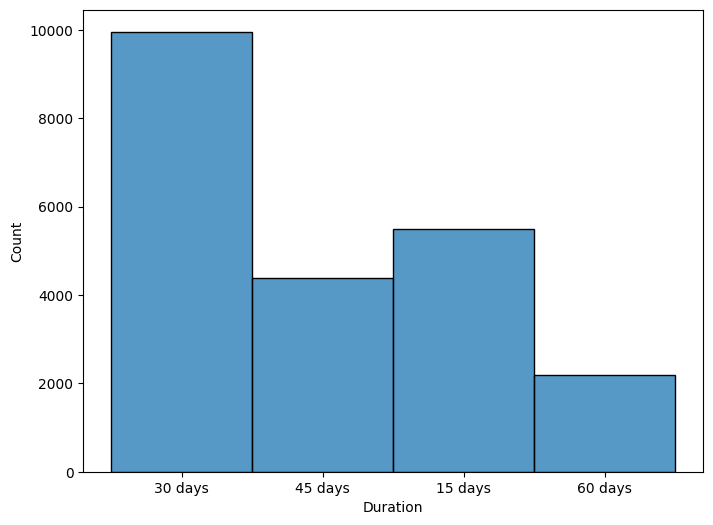

In [228]:
plt.figure(figsize=(8,6))
sns.histplot(Markating_Campaign['Duration'])
plt.show()

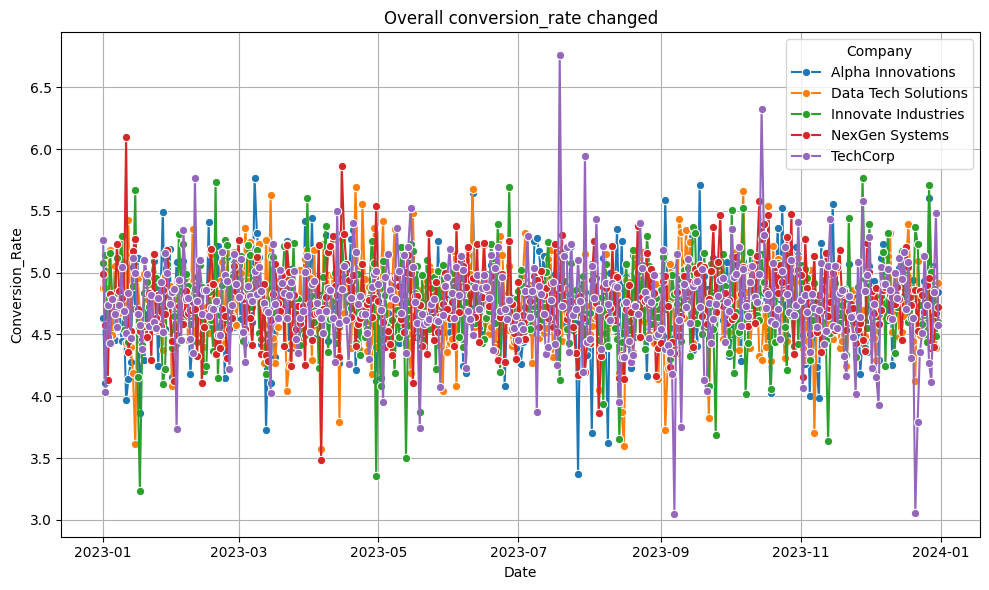

In [260]:
Markating_Campaign = Markating_Campaign.groupby(['Date', 'Company'])['Conversion_Rate'].mean().reset_index()

Markating_Campaign['Date'] = pd.to_datetime(Markating_Campaign['Date'], format = 'mixed')

plt.figure(figsize=(10,6))
sns.lineplot(Markating_Campaign, x= 'Date', y='Conversion_Rate', hue= 'Company', marker = 'o')
plt.title('Overall conversion_rate changed')
plt.grid(True)
plt.tight_layout()
plt.show()

In [263]:
Markating_Campaign = Markating_Campaign.groupby('Date')['Engagement_Score'].mean().reset_index()

In [265]:
Markating_Campaign['Date'] = pd.to_datetime(Markating_Campaign['Date'], format = 'mixed')

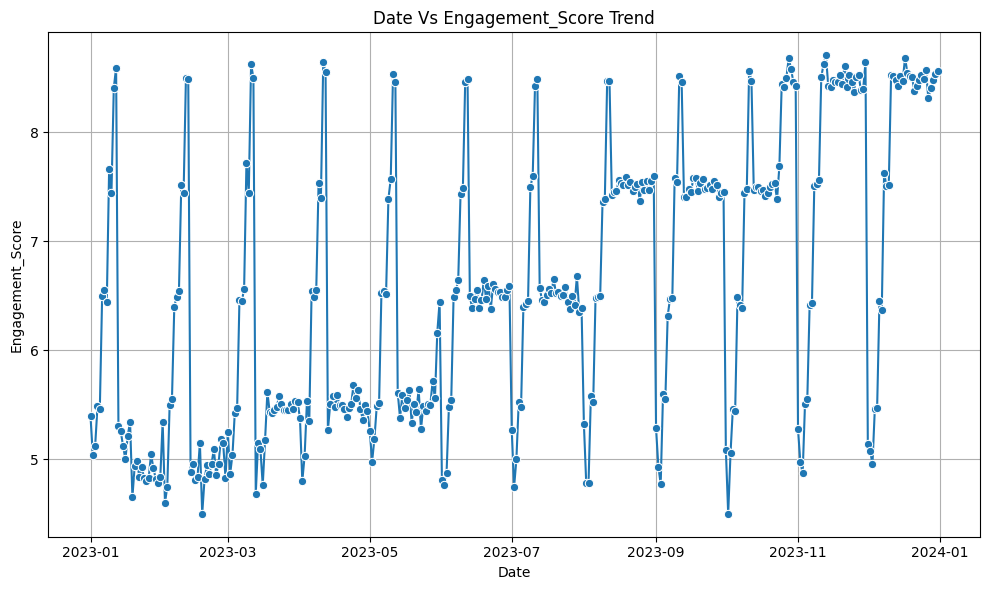

In [267]:
plt.figure(figsize=(10,6))
sns.lineplot(Markating_Campaign, x= 'Date', y='Engagement_Score', marker = 'o')
plt.title('Date Vs Engagement_Score Trend')
plt.tight_layout()
plt.grid(True)
plt.show()

According to the chart, trend of engagement score is increasing with Date.

Geographic Analysis

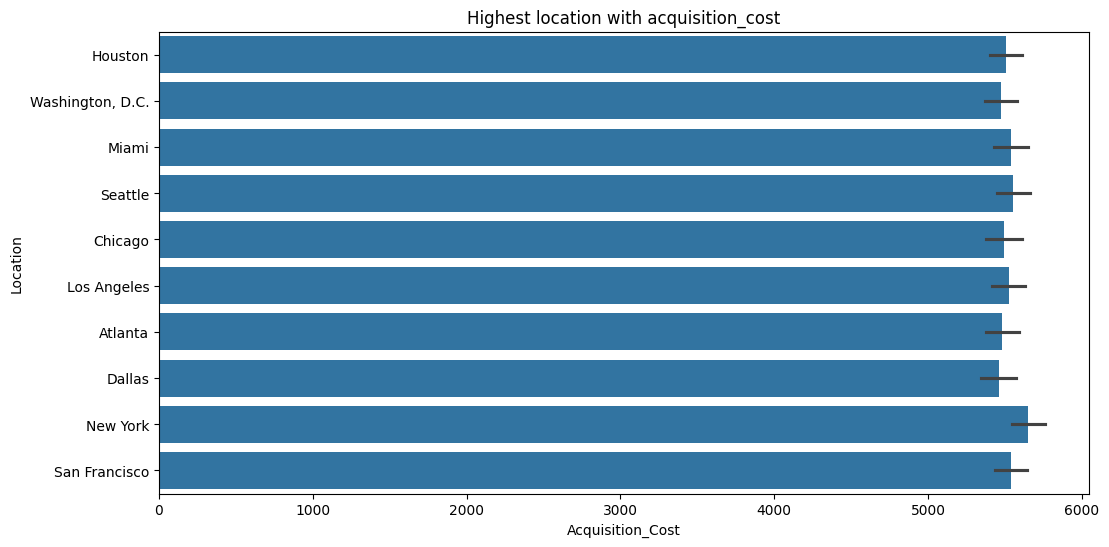

In [278]:
plt.figure(figsize=(12,6))
sns.barplot(Markating_Campaign, x= 'Acquisition_Cost', y = 'Location')
plt.title('Highest location with acquisition_cost')
plt.show()

Here NEW YORK have the highest Acquisition_Cost.

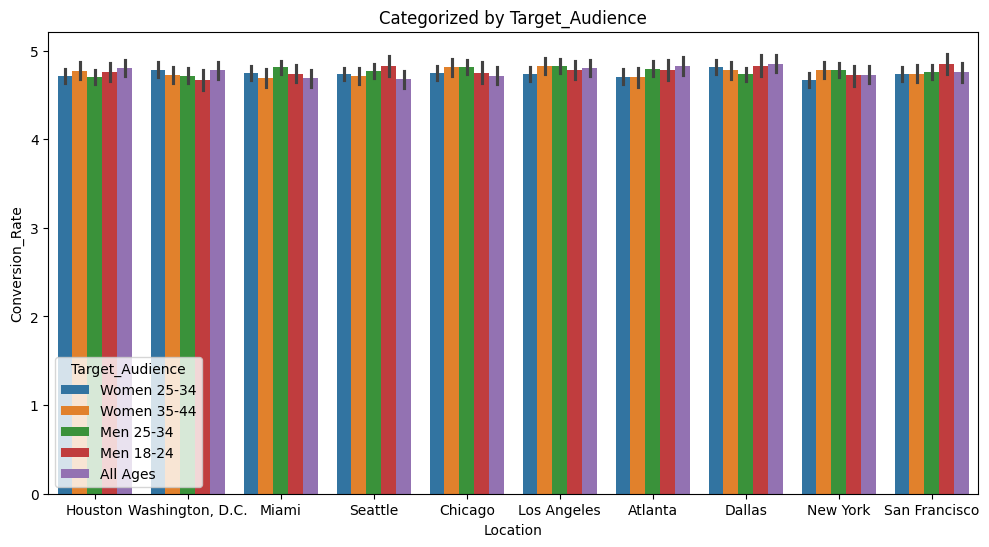

In [279]:
plt.figure(figsize=(12,6))
sns.barplot(Markating_Campaign, x= 'Location', y = 'Conversion_Rate', hue = 'Target_Audience')
plt.title('Categorized by Target_Audience')
plt.show()

In [286]:
plt.figure(figsize=(12,6))
fig = px.pie(Markating_Campaign, values= 'ROI', names= 'Location', title= 'Pie Propotion')
fig.show()

<Figure size 1200x600 with 0 Axes>

Location 'Chicago' have the highest propotion.

#Conclusion:

In the highly competitive landscape of digital marketing, effectively evaluating the success of various marketing campaigns is essential for optimizing return on investment (ROI) and improving acquisition cost.


From conversion rates, acquisition costs, and ROI across different campaign types, channels, and audience segments. it give the insights about the 'Social Media' trend in Engagement score analysis.


By examining temporal trends, geographical influences campaign success, their should be need a duration for conversion rate with engagement score for each locations in future marketing strategies.